



$ \huge{\textbf{P463 Assignment 5}} $
$ \hspace{.1cm} $

$ \large{\textbf{1. Stellar Evolution}}$

$\textit{MESA files and logs are available in this github.}$

$ \large{\textbf{2. Hertzsprung-Russell diagram}}$

The Hertzsprung-Russell (HR) diagram shows the evolutionary track of a star. The diagram plots the logarithm of the effective temperature (`log10(Teff / K)`) against the logarithm of the luminosity (`log10(L / L☉)`). The temperature axis is inverted to follow the standard convention, where hotter temperatures are to the left.

In [1]:
import mesa_reader as mr
import matplotlib.pyplot as plt
import numpy as np

$ \large{\textbf{2.a}}$

Plot an H-R diagram for your star showing its evolutionary track and check it against
the literature to make sure it makes sense. On the horizontal axis, plot log10(Teff /K),
and on the vertical axis plot log10(L/L ). Make the temperature increase from right
to left, as is standard. Use a colour bar to represent time (make the track
change colours as it evolves). Include contours (they will be straight lines) showing
log10(R/R ).

In [2]:
# MesaData object
h = mr.MesaData('./mesa_sim/LOGS/history.data')
p = mr.MesaData('./mesa_sim/LOGS/profile1.data')

In [3]:
# Extract data for plotting
log_Teff = h.log_Teff               # Logarithm of the effective temperature
log_L = h.log_L                     # Logarithm of the luminosity
star_age = h.star_age               # Age of the star in years
star_mass = h.star_mass             # Mass of the star in solar masses
log_R = h.log_R                     # Logarithm of the stellar radius in solar units

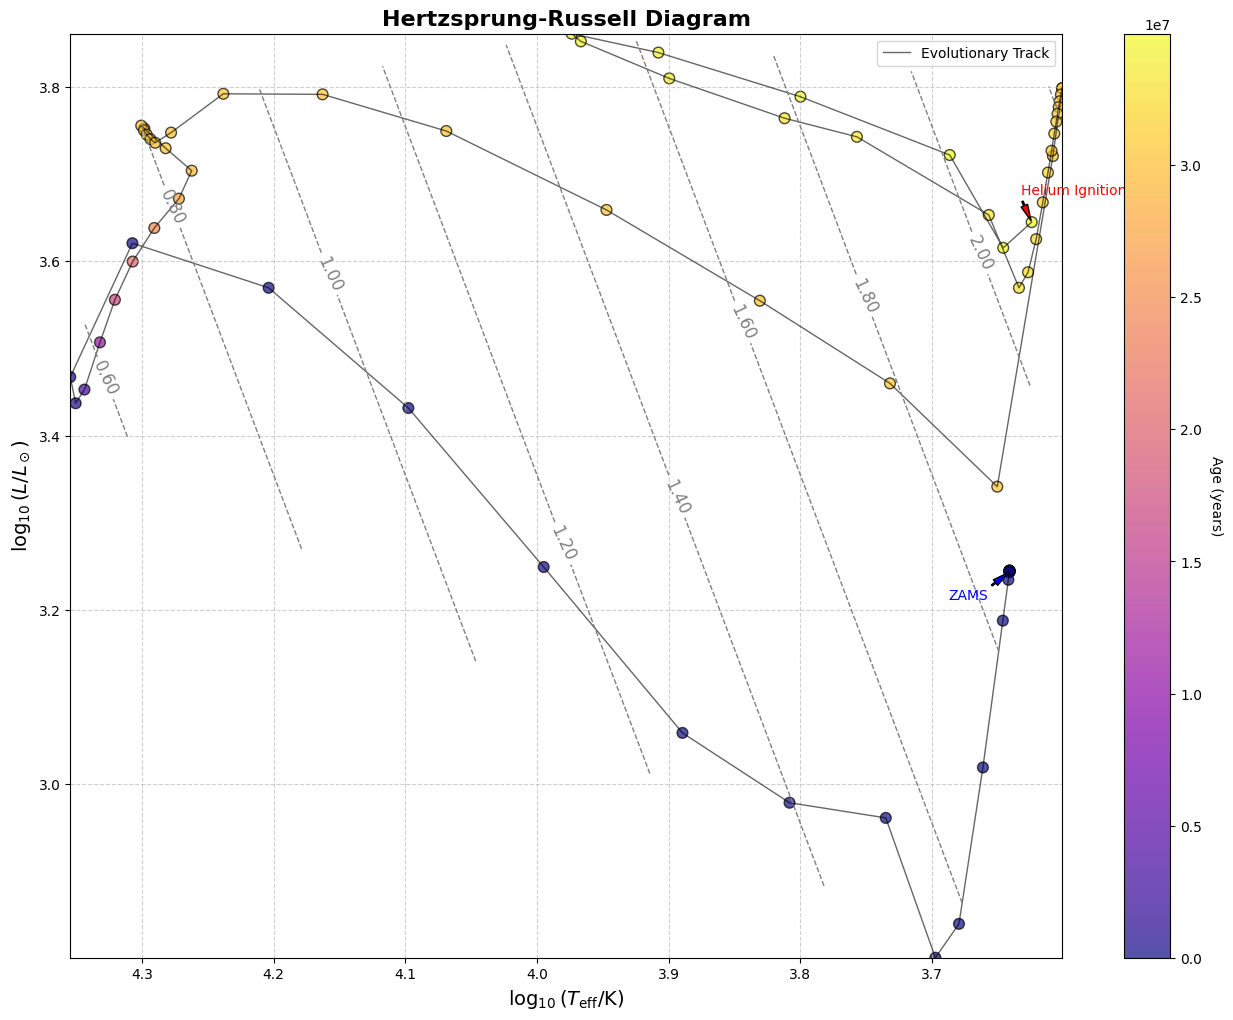

In [4]:
# HR Diagram
plt.figure(figsize=(16, 12))

sc = plt.scatter(log_Teff, log_L, c=star_age, cmap='plasma', marker='o', s=60, edgecolor='k', alpha=0.7)
plt.plot(log_Teff, log_L, color='black', linewidth=1, linestyle='-', alpha=0.6, label='Evolutionary Track')

plt.gca().invert_xaxis()

contour = plt.tricontour(log_Teff, log_L, log_R, levels=10, linewidths=1, colors='grey', linestyles='dashed')
plt.clabel(contour, inline=True, fontsize=12, fmt='%.2f')

cbar = plt.colorbar(sc)
cbar.set_label('Age (years)', rotation=270, labelpad=15)

plt.title('Hertzsprung-Russell Diagram', fontsize=16, fontweight='bold')
plt.xlabel(r'$\log_{10}(T_{\mathrm{eff}} / \mathrm{K})$', fontsize=14)
plt.ylabel(r'$\log_{10}(L / L_\odot)$', fontsize=14)

plt.annotate('ZAMS', (log_Teff[0], log_L[0]), textcoords="offset points", 
             xytext=(-30, -20), ha='center', fontsize=10, color='blue', 
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1, headwidth=5))

plt.annotate('Helium Ignition', (log_Teff[-1], log_L[-1]), textcoords="offset points", 
             xytext=(30, 20), ha='center', fontsize=10, color='red', 
             arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=5))

plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend(loc='best')

plt.savefig('plots/HR.png', dpi=300)
plt.show()

![Enhanced Hertzsprung-Russell Diagram](plots/HR.png)

**Figure:** Hertzsprung-Russell Diagram showing the evolutionary track of a star. The color represents the age of the star, and contours represent the logarithm of the stellar radius.

$ \large{\textbf{2.b}}$

Indicate the direction of increasing values: left for B − V and up for MV.

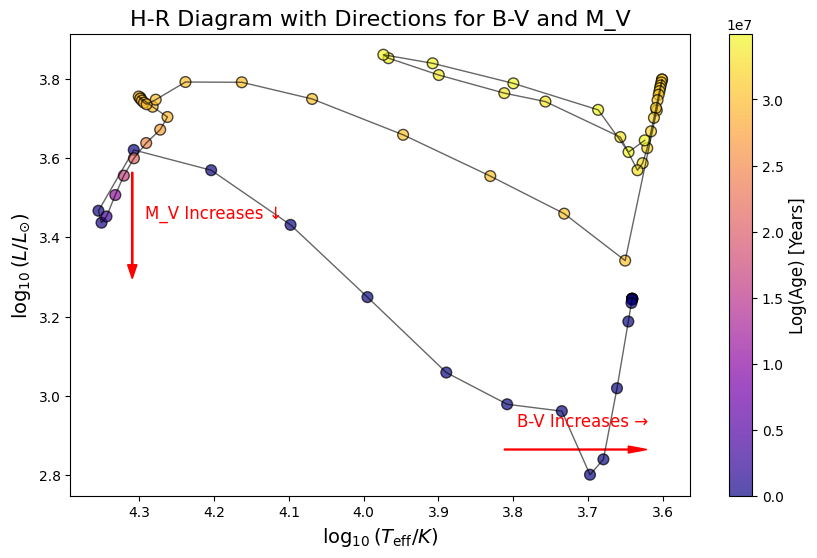

In [5]:
log_Teff = h.data('log_Teff')  # Logarithm of effective temperature
log_L = h.data('log_L')  # Logarithm of luminosity
star_age = h.star_age  # Age of the star

plt.figure(figsize=(10, 6))

sc = plt.scatter(log_Teff, log_L, c=star_age, cmap='plasma', marker='o', s=60, edgecolor='k', alpha=0.7)
plt.plot(log_Teff, log_L, color='black', linewidth=1, linestyle='-', alpha=0.6, label='Evolutionary Track')

cbar = plt.colorbar(sc)
cbar.set_label('Log(Age) [Years]', fontsize=12)

plt.xlabel(r'$\log_{10}(T_{\text{eff}} / K)$', fontsize=14)
plt.ylabel(r'$\log_{10}(L / L_{\odot})$', fontsize=14)
plt.gca().invert_xaxis()  # Invert x-axis for the correct direction of temperature

plt.annotate('B-V Increases →', xy=(0.72, 0.15), xycoords='axes fraction', fontsize=12, color='red')
plt.annotate('M_V Increases ↓', xy=(0.12, 0.6), xycoords='axes fraction', fontsize=12, color='red')

plt.arrow(0.7, 0.1, 0.2, 0, transform=plt.gca().transAxes, color='red', width=0.002, head_width=0.015, head_length=0.03)
plt.arrow(0.1, 0.7, 0, -0.2, transform=plt.gca().transAxes, color='red', width=0.002, head_width=0.015, head_length=0.03)

plt.title('H-R Diagram with Directions for B-V and M_V', fontsize=16)
plt.savefig('plots/HR_w_indicator.png', dpi=300)
plt.show()

![Indicated Hertzsprung-Russell Diagram](plots/HR_w_indicator.png)

**Figure**: The **B-V color index** measures the color of the star, which is directly related to its temperature. As the star cools, the B-V color index increases; thus, it would increase to the right on the horizontal axis, opposite to the direction of decreasing temperature. The **absolute magnitude (MV)** represents the star's intrinsic brightness, where higher magnitude values indicate a dimmer star. Consequently, MV increases downward on the vertical axis, opposite to the increase in luminosity.

However, since we could not find the B-V color index values in the history files and found no relevant information in the MESA documentation, we did not plot this data.

$ \large{\textbf{2.c}}$

What is the spectral type of your star on the main sequence?

In [6]:
# The effective temperature at ZAMS
Teff_zams = h.data('log_Teff')[0]  
Teff_zams_K = 10**Teff_zams  

# Determine the spectral type
if Teff_zams_K > 30000:
    spectral_type_zams = 'O'
elif Teff_zams_K > 10000:
    spectral_type_zams = 'B'
elif Teff_zams_K > 7500:
    spectral_type_zams = 'A'
elif Teff_zams_K > 6000:
    spectral_type_zams = 'F'
elif Teff_zams_K > 5200:
    spectral_type_zams = 'G'
elif Teff_zams_K > 3700:
    spectral_type_zams = 'K'
else:
    spectral_type_zams = 'M'

print(f"Spectral type at ZAMS: {spectral_type_zams}")

Spectral type at ZAMS: K


$ \large{\textbf{2.d}}$

What is the spectral type of your star at the onset of helium burning?

In [7]:
# The onset of helium burning
onset_index = np.where(h.data('log_LHe') > -1)[0][0]  # LHe becomes dominant

Teff_he_burn = h.data('log_Teff')[onset_index]
Teff_he_burn_K = 10**Teff_he_burn  

if Teff_he_burn_K > 30000:
    spectral_type_he_burn = 'O'
elif Teff_he_burn_K > 10000:
    spectral_type_he_burn = 'B'
elif Teff_he_burn_K > 7500:
    spectral_type_he_burn = 'A'
elif Teff_he_burn_K > 6000:
    spectral_type_he_burn = 'F'
elif Teff_he_burn_K > 5200:
    spectral_type_he_burn = 'G'
elif Teff_he_burn_K > 3700:
    spectral_type_he_burn = 'K'
else:
    spectral_type_he_burn = 'M'

print(f"Spectral type at onset of helium burning: {spectral_type_he_burn}")

Spectral type at onset of helium burning: K


$ \large{\textbf{2.e}}$

How long does it take for your star to reach the helium core burning phase?

In [8]:
# The age at ZAMS and onset of helium burning
age_zams = h.star_age[0]
age_he_burn = h.star_age[onset_index]

# Duration
time_to_he_burn = age_he_burn - age_zams

print(f"Time to reach helium core burning: {time_to_he_burn:.2e} years")


Time to reach helium core burning: 3.04e+07 years


$ \large{\textbf{2.f}}$

Approximately what fraction of this time is spent on the main sequence?

In [21]:
time_main_sequence = time_to_he_burn  
total_time = h.star_age[-1]

# fraction of time spent on the main sequence
fraction_main_sequence = time_main_sequence / total_time

print(f"Fraction of time spent on the main sequence: {fraction_main_sequence:.2%}")

Fraction of time spent on the main sequence: 86.94%


$ \large{\textbf{3. Mass evolution}}$

Plot the mass M vs time t for your star. If it is almost constant, reduce
the range of M until you can see the evolution clearly.

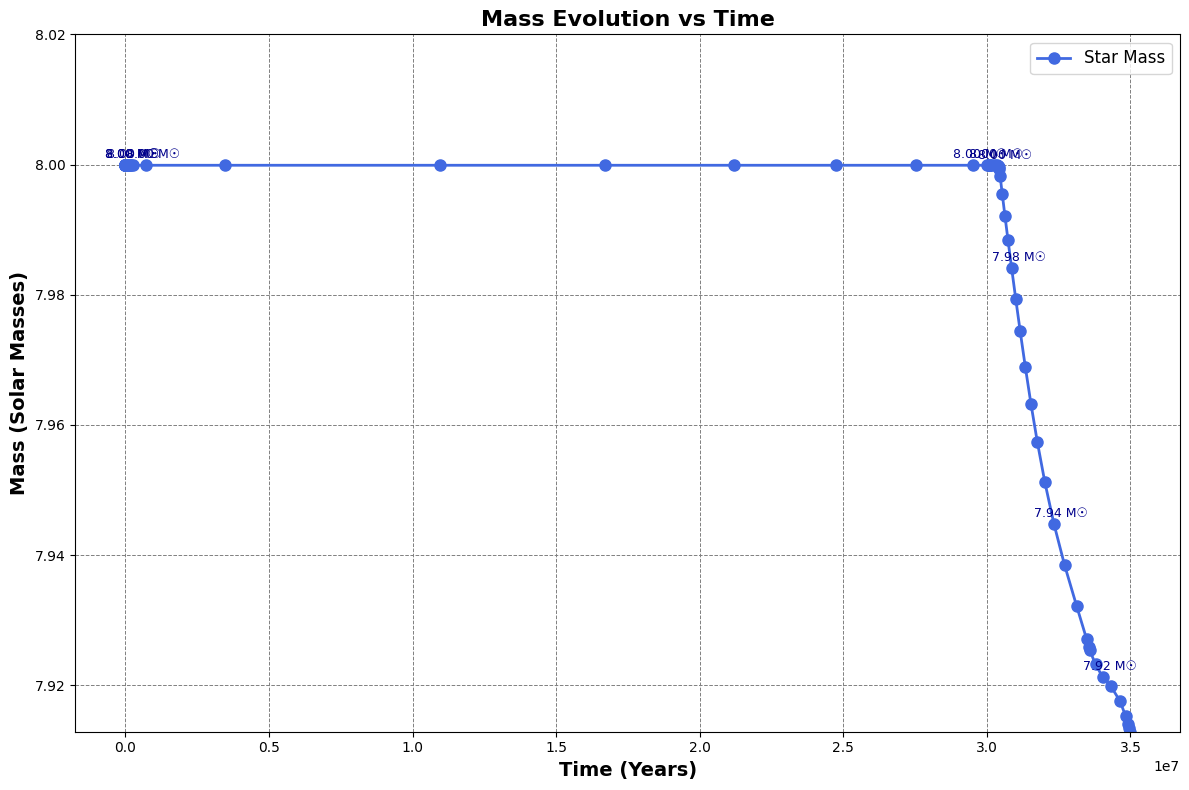

In [25]:
mass = h.data('star_mass')  # Mass of the star
time = h.star_age           # Time in years

plt.figure(figsize=(12, 8))
plt.plot(time, mass, color='royalblue', linestyle='-', marker='o', markersize=8, linewidth=2, label='Star Mass')

plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')

for i in range(0, len(time), len(time)//10):  
    plt.annotate(f'{mass[i]:.2f} M☉', (time[i], mass[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9, color='darkblue')

plt.xlabel('Time (Years)', fontsize=14, fontweight='bold')
plt.ylabel('Mass (Solar Masses)', fontsize=14, fontweight='bold')
plt.title('Mass Evolution vs Time', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()

plt.ylim(min(mass), max(mass)+0.02)
plt.savefig('mass_v_t.png', dpi=300)
plt.show()